<a href="https://colab.research.google.com/github/saurabhdaund76/Book-Recommendation-System/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading user csv
user_df = pd.read_csv('/content/drive/MyDrive/ML projects/Users.csv')

In [3]:
# reading ratings csv
ratings_df = pd.read_csv('/content/drive/MyDrive/ML projects/Ratings.csv')

In [4]:
# reading books csv
books_df = pd.read_csv('/content/drive/MyDrive/ML projects/Books.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# shape of all df

print(ratings_df.shape)
print(user_df.shape)
print(books_df.shape)

(1149780, 3)
(278858, 3)
(271360, 8)


In [6]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
ratings_df['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: User-ID, Length: 105283, dtype: int64

In [8]:
ratings_df.groupby('User-ID')['Book-Rating'].sum().reset_index()

,User-ID,Book-Rating
0,2,0
1,7,0
2,8,39
3,9,6
4,10,6
...,...,...
105278,278846,8
105279,278849,9
105280,278851,91
105281,278852,8


In [9]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


so here we can see we have some extra columns which are not required like image url s m l so we will drop them

In [10]:
books_df = books_df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1)

In [11]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Data preprocessing 

In [12]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [13]:
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

as we can see we only have null values in books df and user df

In [15]:
# we deleted the cells with empty rows
books_df = books_df.dropna(axis=0)

In [16]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271357 non-null  object
 1   Book-Title           271357 non-null  object
 2   Book-Author          271357 non-null  object
 3   Year-Of-Publication  271357 non-null  object
 4   Publisher            271357 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


as we can see there are no null values

As we can see year of publication is object type it should be numeric type

In [17]:
books_df['Year-Of-Publication'].astype

<bound method NDFrame.astype of 0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: Year-Of-Publication, Length: 271357, dtype: object>

In [18]:
books_df['Year-Of-Publication'].unique()


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Here we have some of the string values as well as we have invalid years ie years above 2021 so we will try nad handle these values

In [19]:
print(len(books_df[books_df['Year-Of-Publication']=='DK Publishing Inc']))
print(len(books_df[books_df['Year-Of-Publication']=='Gallimard']))
print(len(books_df[books_df['Year-Of-Publication']==0]))

2
1
3570


As we can see there are around 3570 values which have 0 as a publication year

In [20]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271357,271357,271357,271357,271357
unique,271357,242133,102022,202,16806
top,0679762655,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13902,7535


as we can see top value in publication is 2002 so we will replace all these values with 2002 including the year greater then 2021


In [21]:
books_df[books_df['Year-Of-Publication']=='DK Publishing Inc'] = 2002
books_df[books_df['Year-Of-Publication']=='Gallimard']=  2002

In [22]:
books_df['Year-Of-Publication'].unique()
# we replaced the string values by year 

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Now we will convert object type to int type for publication column

In [23]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)


Now we will change all 0 years with max year and all the years above 2021 by max year ie 2002

In [24]:
books_df.loc[books_df['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books_df.loc[books_df['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [25]:
# dropping duplicates
books_df.drop_duplicates(keep='last', inplace=True) 
books_df.reset_index(drop = True, inplace = True)

Users data preprocessing

In [26]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [27]:
# as we have seen we have missing values in age column 
user_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [28]:
# fill missing values with mean
user_df['Age'].fillna(user_df.Age.mean(), inplace=True)


In [29]:
user_df['Age'].isnull().sum()

0

here age values are too high which even practically seems impossible so we will take only age greater then 5 and less then 80 sp we will substitute all these values with mean


In [30]:
user_df.loc[user_df['Age']>=80, 'Age'] = round(user_df['Age'].mean())
user_df.loc[user_df['Age']<=10, 'Age'] = round(user_df['Age'].mean())

In [31]:
user_df['Age'] = user_df['Age'].astype(int)       #changing Datatype to int


In [32]:
## Drop duplicate rows
user_df.drop_duplicates(keep='last', inplace=True)
user_df.reset_index(drop=True, inplace=True)

In [33]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [34]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


ratings data pre processing

In [35]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [36]:
ratings_df['ISBN'].unique()

array(['034545104X', '0155061224', '0446520802', ..., '0679752714',
       '0806917695', '05162443314'], dtype=object)

**Merging all three tables**

In [37]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [38]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Here 1st we will merge books and ratings as they seems more related by inner join

In [39]:
final_df = pd.merge(books_df,ratings_df , on = 'ISBN',how='inner')

In [40]:
final_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0
...,...,...,...,...,...,...,...
1031124,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463,7
1031125,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579,4
1031126,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,276680,0
1031127,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,276680,0


here we will merge final_df with users 

In [41]:
total_data = pd.merge(final_df, user_df,  on='User-ID', how='inner')

In [42]:
total_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",34
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",34
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",34
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",34


As we can see there are many 0 ratings in book rating

**EDA**

Text(0.5, 1.0, 'Total number of books by top 15 authors')

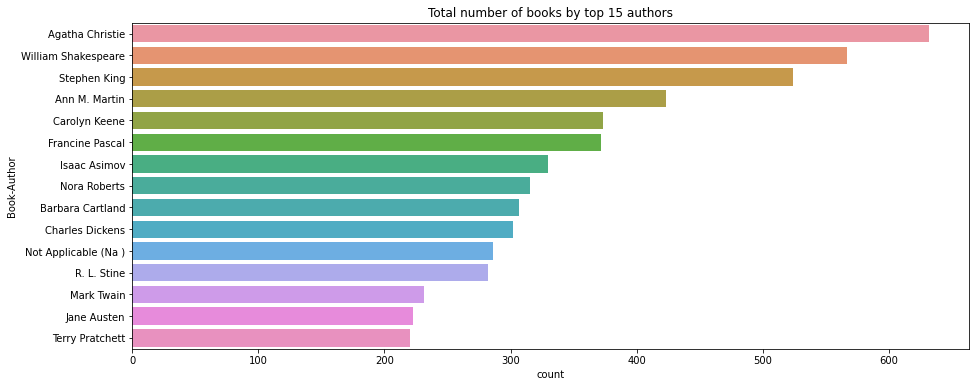

In [43]:
# books count by top 15 authors
plt.figure(figsize=(15,6))
sns.countplot(y= 'Book-Author'  , data=books_df,order=books_df['Book-Author'].value_counts().index[0:15])
plt.title('Total number of books by top 15 authors')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text major ticklabel objects>)

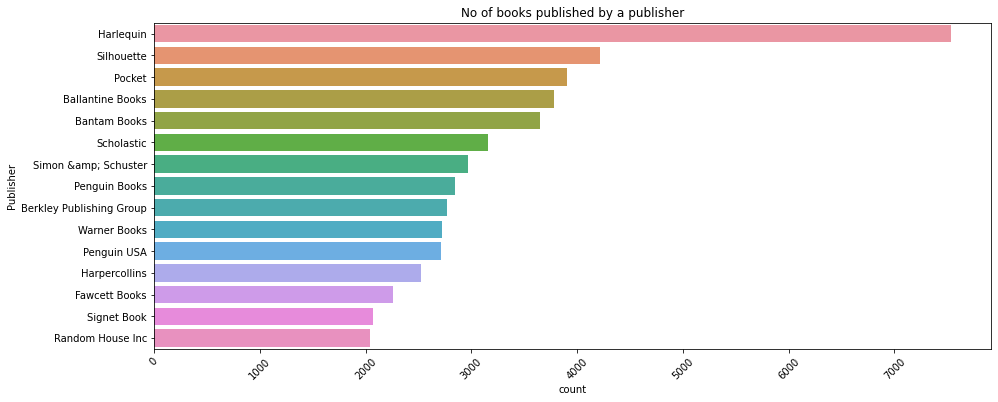

In [44]:
# number of books published by publisher
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books_df,order=books_df['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'ratings of book')

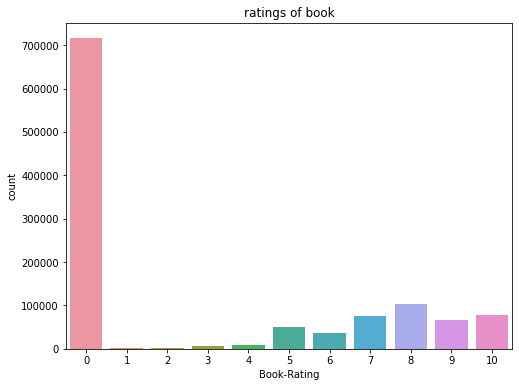

In [45]:
# ratings of books
plt.figure(figsize=(8,6))
sns.countplot(x='Book-Rating',data=ratings_df)
plt.title('ratings of book')

Now we will plot for the explicit ratings the ratings without zero ratings

Text(0.5, 1.0, 'explicit ratings')

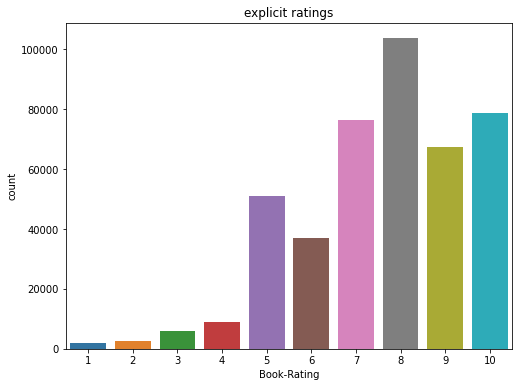

In [46]:
plt.figure(figsize=(8,6))
data=ratings_df[ratings_df['Book-Rating']!=0]
sns.countplot(x='Book-Rating' , data=data)
plt.title('explicit ratings')

Bins for age distributions

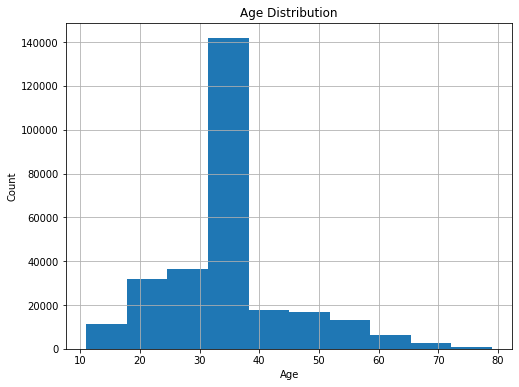

In [47]:
plt.figure(figsize=(8,6))
user_df.Age.hist(bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'No of readers from each city')

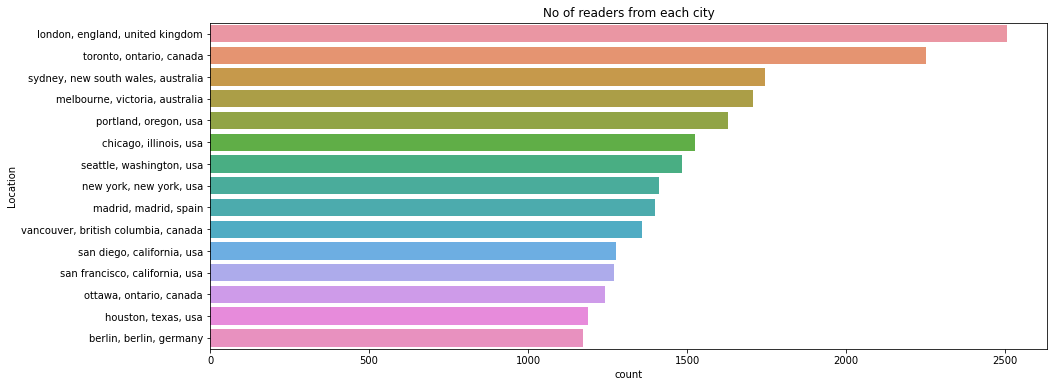

In [48]:
# city wise distribution
plt.figure(figsize=(15,6))
sns.countplot(y="Location", data=user_df,order=user_df['Location'].value_counts().index[0:15])
plt.title("No of readers from each city")

Text(0.5, 1.0, 'Number of Ratings for a book')

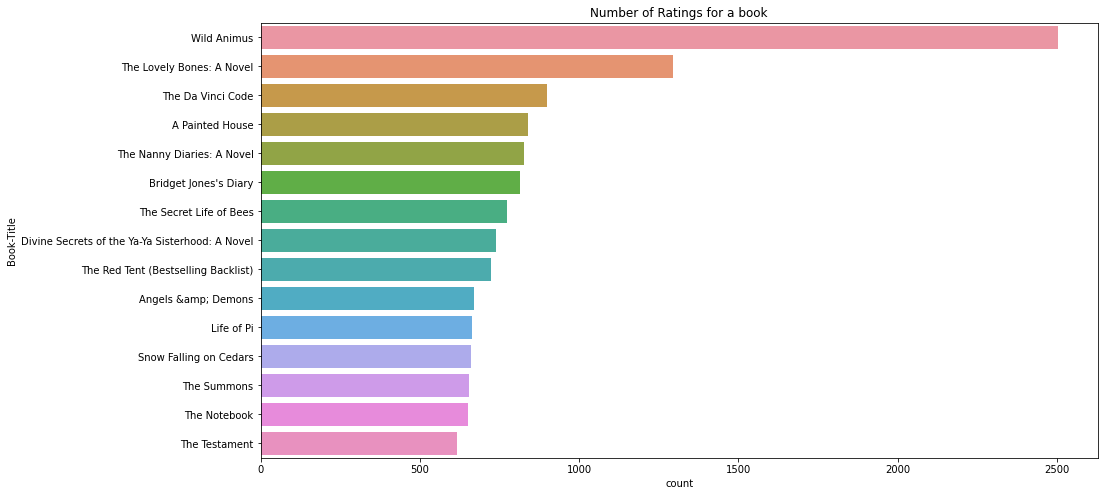

In [49]:
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=total_data, order=total_data['Book-Title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book")

Avarage rating , number of ratings by each book

In [51]:
# here we simply created a dataframe which grouby isbn and book rating by mean and count 
avarage_rating=  pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
avarage_rating['ratingcount'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
avarage_rating.sort_values('ratingcount',ascending=False)

,Book-Rating,ratingcount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
...,...,...
0801064090,0.000000,1
0801064252,5.000000,1
0801064279,0.000000,1


As we can see the book having highest rating count is not rated high 

We will consider only those books with ratings > 50 given by the users and users which have given atleast 100 ratings

In [53]:
counts1 = ratings_df['User-ID'].value_counts()
ratings_df = ratings_df[ratings_df['User-ID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_df['Book-Rating'].value_counts()
ratings_df = ratings_df[ratings_df['Book-Rating'].isin(counts[counts >= 50].index)]

In [56]:
combine_book_rating = pd.merge(ratings_df, books_df, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [57]:
# total rating count
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'TotalRatingCount'})
     [['Book-Title', 'TotalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [58]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [59]:
# book ratings 
print(book_ratingCount['TotalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.90     5.0
0.91     6.0
0.92     7.0
0.93     7.0
0.94     8.0
0.95    10.0
0.96    11.0
0.97    14.0
0.98    19.0
0.99    31.0
Name: TotalRatingCount, dtype: float64


As we can see 99% of the total books are rated only 31 ratings only remaining 1% have more ratings then 31 %

As dataset is large we will take ratings above 50 only

In [60]:
# Limiting TotalRatingCount above 50 ratings.
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('TotalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,TotalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [61]:
rating_popular_book.shape

(62149, 5)

we can see even in 1 % above 50 ratings we have almost 62000 books lets see how many are unique

In [64]:
print(len(rating_popular_book['ISBN'].unique()))

2259
